# Traffic sign detection and classification

In [7]:
from xml.dom import minidom
import pandas as pd

In [17]:
train = []
test = []

with open("test.txt") as _file:
    for line in _file:
        train.append(line.replace('\n', ''))

with open("train.txt") as _file:
    for line in _file:
        test.append(line.replace('\n', ''))

def create_dataframe(data):
    signs = []
    for name in data:
        file = minidom.parse("annotations/" + name + ".xml")
        path = "images/" + file.getElementsByTagName('filename')[0].firstChild.data
        filename = file.getElementsByTagName('filename')[0].firstChild.data
        name = file.getElementsByTagName('name')
        classes = []
        for n in name:
            classes.append(n.firstChild.data)
        number_of_signs = len(classes)

        signs.append([filename, " ".join(classes), path, number_of_signs])

    return pd.DataFrame(signs, columns=['filename', 'classes', 'path', 'number_of_signs'])

df_train = create_dataframe(train)
df_test = create_dataframe(test)

,filename,classes,path,number_of_signs
0,road712.png,speedlimit speedlimit,images/road712.png,2
1,road289.png,stop trafficlight,images/road289.png,2
2,road276.png,speedlimit,images/road276.png,1
3,road262.png,speedlimit,images/road262.png,1
4,road841.png,speedlimit crosswalk,images/road841.png,2
...,...,...,...,...
259,road858.png,speedlimit,images/road858.png,1
260,road455.png,speedlimit,images/road455.png,1
261,road509.png,speedlimit,images/road509.png,1
262,road290.png,speedlimit,images/road290.png,1


## Pre-Trained Model RestNet34 on ImageNet dataset.

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/skdgt/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

[W NNPACK.cpp:80] Could not initialize NNPACK! Reason: Unsupported hardware.


[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:206] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

KeyboardInterrupt: 

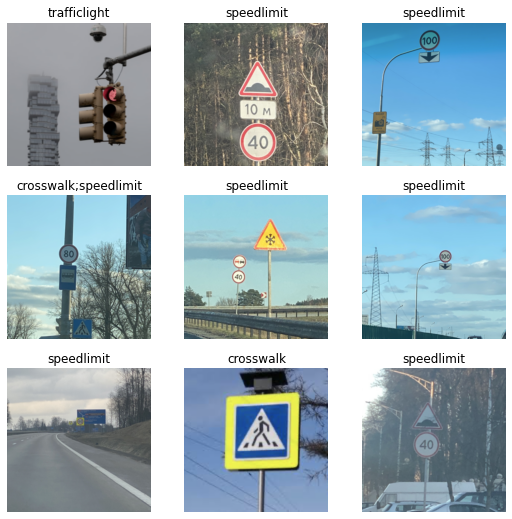

In [20]:
from fastai.vision.all import *

dls_train = ImageDataLoaders.from_df(df_train, folder='images', label_delim=' ',
                               item_tfms=Resize(460))

dls_train.show_batch()


In [ ]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls_train, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

learn.lr_find()